## Projeto 2


### Como microdados que descrevem um magistrado, a exemplo de seu cargo, região e lotação, afetam sua renda total


---------

#### Lendo a base de dados


In [47]:
import pandas as pd
from  IPython.display import display
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import os
import re

In [48]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
df = pd.read_csv("DF/contracheque.csv")

Esperamos trabalhar no diretório
C:\Users\Arthur\OneDrive - Insper - Institudo de Ensino e Pesquisa\Semestre de volta!!!\CDados - Kelly\P2\CDadosP2


## Visualizando a base de dados:

In [49]:
df = df.drop(columns=['cpf']) #Retirando a coluna CPF, pois os valores eram NaN.
df = df.drop(columns=['url']) #Retirando a coliuna URL, pois ela não é muito útil.
df.tail(2)

,nome,cargo,lotacao,subsidio,direitos_pessoais,indenizacoes,direitos_eventuais,total_de_rendimentos,previdencia_publica,imposto_de_renda,descontos_diversos,retencao_por_teto_constitucional,total_de_descontos,rendimento_liquido,remuneracao_do_orgao_de_origem,diarias,tribunal,orgao,data_de_publicacao,mesano_de_referencia
161765,Octavio Augusto Simon de Souza,Juiz Civil de 2º Grau,Aposentado,30471.11,0.0,0.0,0.0,30471.11,3491.57,6497.87,0.0,0.0,9989.44,20481.67,0.0,0.0,Tribunal de Justiça Militar do Estado do Rio G...,Tribunal de Justiça Militar do Rio Grande do Sul,2017-12-06,2017-11-01
161766,Romeu Martinelli,Juiz Civil de 2º Grau,Aposentado,30471.11,0.0,0.0,85987.9,116459.01,5494.49,5974.28,0.0,0.0,11468.77,104990.24,0.0,0.0,Tribunal de Justiça Militar do Estado do Rio G...,Tribunal de Justiça Militar do Rio Grande do Sul,2017-12-06,2017-11-01


In [50]:
# conhecendo os tipos da nossa base de dados
df.dtypes

nome                                 object
cargo                                object
lotacao                              object
subsidio                            float64
direitos_pessoais                   float64
indenizacoes                        float64
direitos_eventuais                  float64
total_de_rendimentos                float64
previdencia_publica                 float64
imposto_de_renda                    float64
descontos_diversos                  float64
retencao_por_teto_constitucional    float64
total_de_descontos                  float64
rendimento_liquido                  float64
remuneracao_do_orgao_de_origem      float64
diarias                             float64
tribunal                             object
orgao                                object
data_de_publicacao                   object
mesano_de_referencia                 object
dtype: object

In [51]:
df.total_de_rendimentos.describe()

count    1.603380e+05
mean     4.093185e+04
std      3.304963e+04
min     -3.454195e+04
25%      3.047110e+04
50%      3.819228e+04
75%      5.234458e+04
max      8.230004e+06
Name: total_de_rendimentos, dtype: float64

In [52]:
df.total_de_descontos.describe()

count    1.617630e+05
mean     8.671913e+03
std      1.118869e+04
min     -1.003869e+05
25%      2.109750e+03
50%      9.423540e+03
75%      1.244000e+04
max      1.174584e+06
Name: total_de_descontos, dtype: float64

In [53]:
df.rendimento_liquido.describe()

count    1.603340e+05
mean     3.001104e+04
std      2.766561e+04
min     -3.454195e+04
25%      2.021386e+04
50%      2.727021e+04
75%      3.813852e+04
max      7.267672e+06
Name: rendimento_liquido, dtype: float64

In [56]:
pd.crosstab(df.tribunal , df.total_de_rendimentos)

total_de_rendimentos,-34541.95,-22127.84,-12583.96,-10327.69,-5465.60,-5235.39,-4087.99,-3837.81,-2644.46,-1954.80,...,406242.08,487325.88,520385.63,538436.48,545618.22,729723.03,883504.19,1174584.41,3558771.05,8230004.01
tribunal,,,,,,,,,,,,,,,,,,,,,
Conselho Nacional de Justiça,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Conselho da Justiça Federal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superior Tribunal Militar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superior Tribunal de Justiça,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal Regional Eleitoral da Bahia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tribunal de Justiça do Pará,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal de Justiça do Piauí,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal de Justiça do Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
pd.crosstab(df.tribunal , df.total_de_descontos)

total_de_descontos,-100386.89,-62862.95,-62438.37,-55379.34,-55116.18,-53875.21,-53512.98,-53044.85,-51200.50,-48180.13,...,116222.12,116234.44,116791.27,117128.46,124511.87,125472.12,200410.26,684254.84,962332.20,1174584.41
tribunal,,,,,,,,,,,,,,,,,,,,,
Conselho Nacional de Justiça,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Conselho da Justiça Federal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superior Tribunal Militar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superior Tribunal de Justiça,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal Regional Eleitoral da Bahia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tribunal de Justiça do Pará,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal de Justiça do Piauí,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tribunal de Justiça do Rio Grande do Norte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


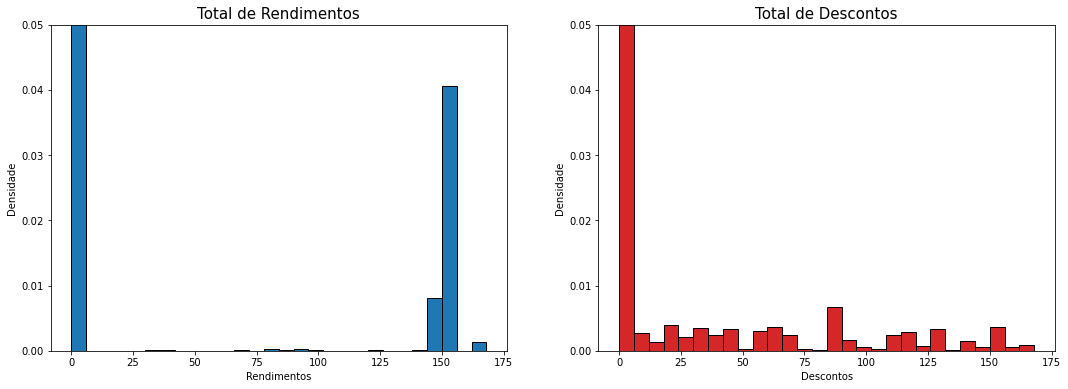

In [34]:
intervalo = np.arange(0, 170, 6)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.hist(df.total_de_rendimentos, bins = intervalo, edgecolor='black', density = True, color = 'tab:blue')
plt.title("Total de Rendimentos", size=15)
plt.xlabel("Rendimentos")
plt.ylabel("Densidade")
plt.ylim(0,0.05)

plt.subplot(122)
plt.hist(df.total_de_descontos , bins = intervalo, edgecolor='black', density = True, color = 'tab:red')
plt.title("Total de Descontos", size=15)
plt.xlabel("Descontos")
plt.ylabel("Densidade")
plt.ylim(0,0.05)


plt.show()

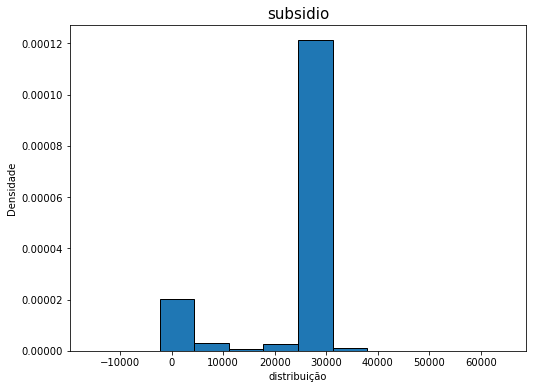

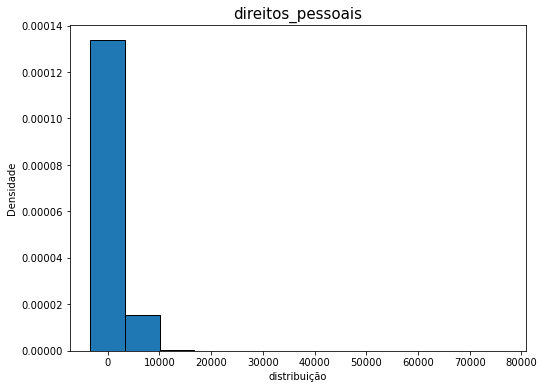

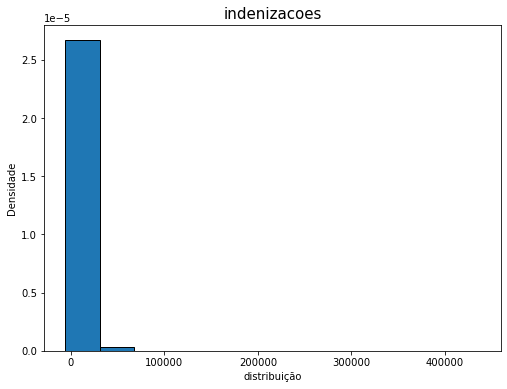

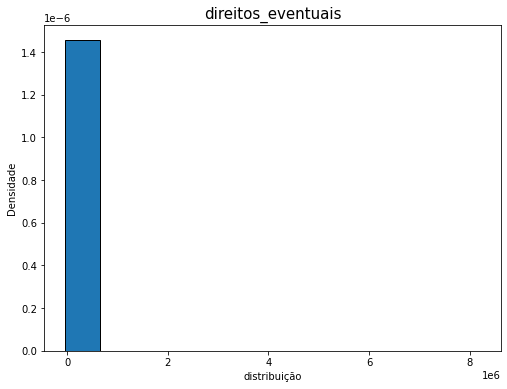

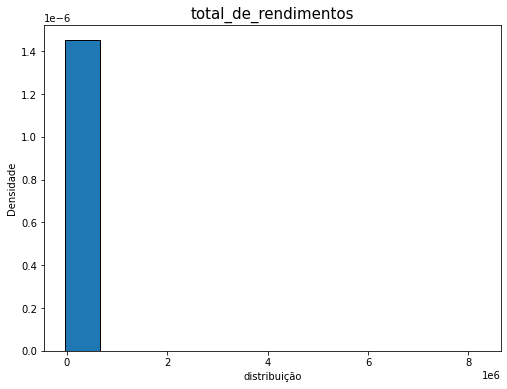

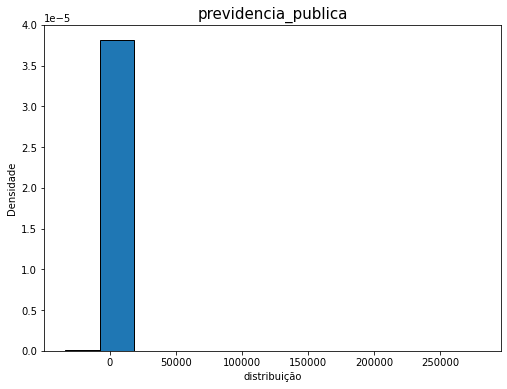

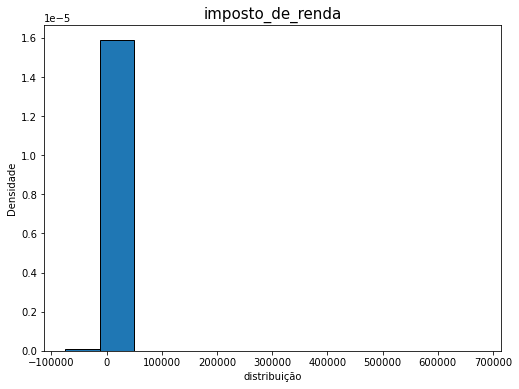

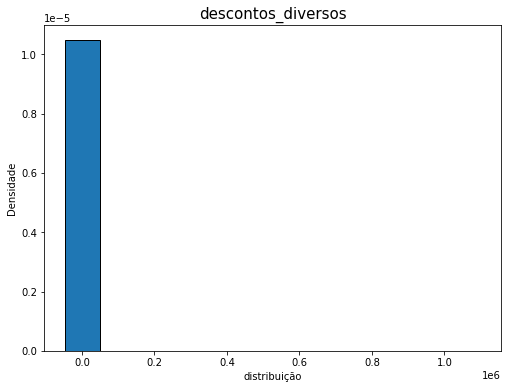

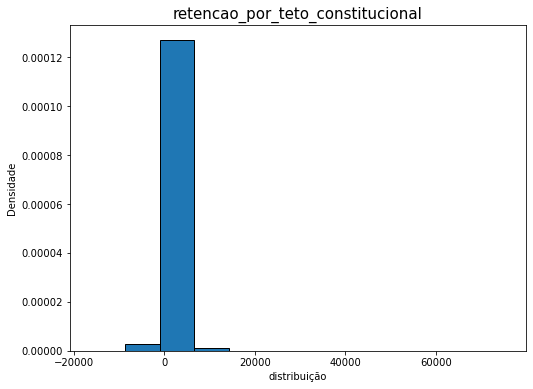

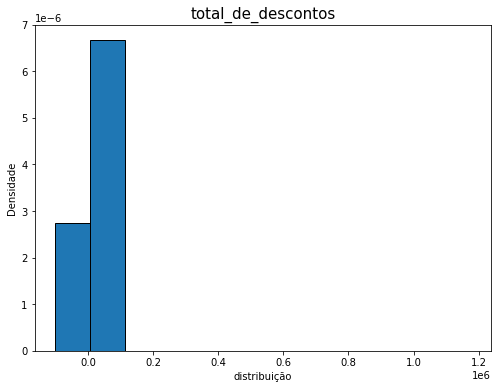

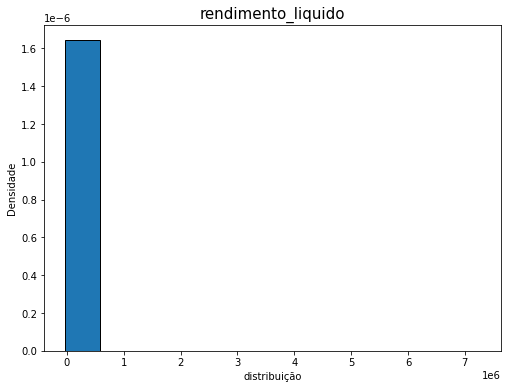

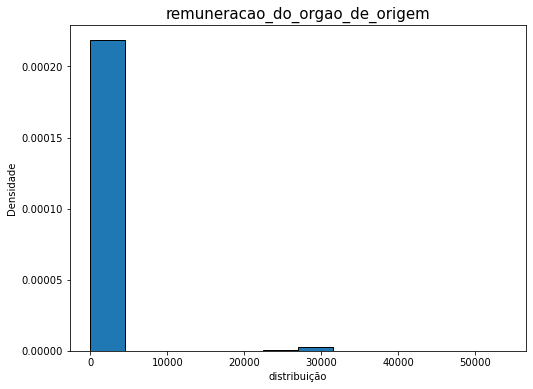

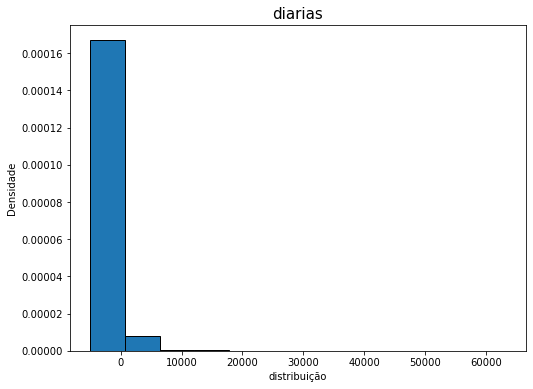

In [39]:
nomes = ['subsidio','direitos_pessoais','indenizacoes','direitos_eventuais','total_de_rendimentos','previdencia_publica','imposto_de_renda','descontos_diversos','retencao_por_teto_constitucional','total_de_descontos','rendimento_liquido','remuneracao_do_orgao_de_origem','diarias']

for i in nomes:
    plt.figure(figsize=(18,6))

    plt.subplot(121)
    plt.hist(df[i], bins = 12, edgecolor='black', density = True, color = 'tab:blue')
    plt.title(f'{i}', size=15)
    plt.xlabel("distribuição")
    plt.ylabel("Densidade")
    #plt.ylim(0,0.5)
plt.show()

### Glossário das Colunas

#### Com o melhor entendimento do leitor em mente, segue a explicação resumida do que cada coluna mais intrincada do dataframe implica:



Variável | Descrição
:---:|---:
cargo | função que o invidíduo exerce no poder judiciário
lotação | jurisdição do magistrado dentro de seu cargo.
subsidio | remuneração mensal fixa dos magistrados e autoridades do setor público
direitos_pessoais | benefícios conseguidos pelo governo, auxílios
indenizações | valor pago ao magistrado para ressarcimento de despesas do serviço
direitos_eventuais | pagamentos incomuns que náo fazem parte da remuneração usual, como férias não aproveitadas
TOTAL DE RENDIMENTOS | montante total recebido pelo indivíduo
previdência pública | valor descontado do salário para cobrir aposentadoria futura
imposto de renda | desconto sobre rendimento mensal
descontos diversos | outros descontos no geral
retenção por teto constitucional | refere-se ao limite máximo de salário ditado pela constituição
RENDIMENTO LÍQUIDO | Montante recebido após feitos todos os descontos
remuneração do órgão de origem | valor bruto da remuneração do funcionário, antes de quaisquer descontos ou benefícios.
diárias | valor recebido para cobrir despesas diversas de viagens e trabalho
Tribunal e Órgão | Instituição à qual o indivíduo empresta seus serviços, seja esta um tribunal ou órgão



In [ ]:
# Já de início, veremos se uma mesma pessoa pode aparecer mais de uma vez no dataframe


Celina = df.loc[df['nome'] == 'CELINA DIETRICH E TRIGUEIROS TEIXEIRA PINTO']

print (len(Celina))
Celina.describe()


#### Como vemos acima, um mesmo magistrado aparece diversas vezes no dataframe. Deve-se isso ao tamanho da amostra, mas esse fato não só não é um problema como nos beneficia.

#### Visto que o dataframe foi atualizado em meses diferentes, cada discrepância individual significa muito menos no todo. Além disso, os dados também revelam salários por posições diversas na magistratura para a mesma pessoa e área, o que nos ajudará a diferenciar a remuneração de cada cargo

-----------------------------------------

-----------

### **Agora, para que possamos posteriormente analisar os magistrados por local de atuação, dividiremos os tribunais por estado de origem, também elencando cada estado por região geográfica**

In [ ]:
# Idealizando uma função que nos devolva o estado e região nos quais um tribunal está inserido.

def Local_Tribunal(tribunal):
    for regiao, estados in regioes.items():
        for estado in estados:
            if tribunal in estados[e]:
                return (estado, regiao)
    return None

# Aplique essa função ao seu DataFrame para criar a nova coluna de região
df['regiao'] = df['estado'].apply(Local_Tribunal)  # Supondo 'estado' como a coluna com os estados


# Criaremos um grande dicionário único, que separa os Tribunais por estados nos quais estão localizados e esses estados pelas respectivas regiões geográficas.

### Análise exploratória

#### Tabela de frequências

In [ ]:
#Frequências de lotações
frequencia_de_lotacoes_absoluta = df.lotacao.value_counts()
frequencia_de_lotacoes_relativa = df.lotacao.value_counts(True)

#Frequência de tribunais = Frequencia de órgãos
frequencia_de_tribunais_absoluta = df.tribunal.value_counts()
frequencia_de_tribunais_relativa = df.tribunal.value_counts(True)

#### Outros dados importantes

In [ ]:
total_de_linhas = df.nome.count()

#Salários e descontos
salario_bruto_medio = df.total_de_rendimentos.mean()
salario_liquido_medio = df.rendimento_liquido.mean()
subsidio_medio = df.subsidio.mean()
imposto_de_renda_medio = df.imposto_de_renda.mean()

#Encontrando a porcentagem de magistrados indenizados
zero_count_indenizacoes = (df['indenizacoes'] == 0).sum()
total_de_indenizacoes = total_de_linhas - zero_count_indenizacoes
porcentagem_de_magistrados_indenizados = (total_de_indenizacoes/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com direitos pessoais (auxílios)
zero_count_auxilios = (df['direitos_pessoais'] == 0).sum()
total_de_auxilios = total_de_linhas - zero_count_auxilios
porcentagem_de_magistrados_com_auxilios = (total_de_auxilios/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com direitos eventuais (auxílios especiais)
zero_count_auxilios_especiais = (df['direitos_eventuais'] == 0).sum()
total_de_auxilios_especias = total_de_linhas - zero_count_auxilios_especiais
porcentagem_de_magistrados_com_auxilios_especiais = (total_de_auxilios_especias/total_de_linhas) * 100
porcentagem_de_magistrados_com_auxilios_especiais

#Encontrando a porcentagem de magistrados com descontos de previdencia pública
zero_count_previdencia_publica = (df['previdencia_publica'] == 0).sum()
total_de_previdencias_publicas = total_de_linhas - zero_count_previdencia_publica
porcentagem_de_magistrados_com_previdencias_publicas = (total_de_previdencias_publicas/total_de_linhas) * 100

#Encontrando a porcentagem de magistrados com descontos diversos
zero_count_descontos_diversos = (df['descontos_diversos'] == 0).sum()
total_de_descontos_diversos = total_de_linhas - zero_count_descontos_diversos
porcentagem_de_magistrados_com_descontos_diversos = (total_de_descontos_diversos/total_de_linhas) * 100